# Lógica paraconsistente com Python

Método paraconsistente de DeciSão (MPD) em Python

Passo a passo para entender e aplicar o MPD em Python.

## Bloco 1 - Introdução.

No MPD, cada informação representa 2 valores.

* a -> Grau de evidência favorável (crença) (certeza)
* b -> Grau de evidência contrária (descrença) (incerteza)

Esses valores ficam sempre **0 e 1**

In [14]:
"(λ) Lambda"
"(μ) Mu"
'''Exemplo de anotação paraconsistente

a = grau de crença (0 a 1)

b = grau de descrença (0 a 1)'''

a = 0.8 # 80% de confiança que é verdadeiro
b = 0.3 # 30% de confiança que é falso

print(f'Grau de crença (a): {a}')
print(f'Grau de descrença (b): {b}')


Grau de crença (a): 0.8
Grau de descrença (b): 0.3


* Se A == 1 e B == 0 -> certeza que é verdadeiro.
* Se A == 0 e B == 1 -> certeza que é falso.
* Se os dois são altos -> Contradição.
* Se os decisão baixos -> inconsistência  (falta de informação).

## Bloco 2 - Grau de Certeza (Gc)

Equação: [Gc = a - b]

* Se Gc > 0 -> mais tendencia para verdadeiro.
* Se Gc < 0 -> mais tendencia para falso.
* Se Gc = 0 -> indecisão.




In [18]:
def grau_certeza(a, b):
    """Calcula o grau de certeza (Gc) baseado nos valores de a e b."""
    return a - b

Gc = grau_certeza(a, b)
print(f'Grau de Certeza (Gc): {Gc:.2f}')

Grau de Certeza (Gc): 0.50


## Bloco 3 - Grau de contradição (Gct)

Equação: [Gct = a + b - 1]

* Se Gct = 0 -> Sem contradição.
* Se Gct > 0 -> Há contradição (crença e descrença altos).
* Se Gct < 0 -> Falta de informação.

In [19]:
def grau_contradição(a, b):
    """Calcula o grau de contradição (Gct) baseado nos valores de a e b."""
    return a + b - 1

Gct = grau_contradição(a, b)
print(f'Grau de Contradição (Gct): {Gct:.2f}')


Grau de Contradição (Gct): 0.10


## Bloco 4 - Nó de analise paraconsistente (NAP)

* O NAP recebe (a, b) e devolve (Gc, Gct)

In [ ]:
def NAP(a, b):
    Gc = a - b
    Gct = a + b - 1
    return Gc, Gct

Gc, Gct = NAP(a, b)
print(f'Grau de Certeza (Gc): {Gc:.2f} / Grau de Contradição (Gct): {Gct:.2f}')


Grau de Certeza (Gc): 0.50 / Grau de Contradição (Gct): 0.10


## Bloco 5 - Operadores OR e AND

### * OR(maximização): escolhe os maiores valores de crença e descrença.

### * AND(minimização): Escolhe os menores valores.

In [24]:
from typing import List, Tuple

def OR(pares: List[Tuple[float, float]]) -> Tuple[float, float]:
    """Operador OR (maximização) para uma lista de pares (a, b)."""
    a_valores = [a for a, b in pares]
    b_valores = [b for a, b in pares]
    return max(a_valores), max(b_valores)

def AND(pares: List[Tuple[float, float]]) -> Tuple[float, float]:
    """Operador AND (minimização) para uma lista de pares (a, b)."""
    a_valores = [a for a, b in pares]
    b_valores = [b for a, b in pares]
    return min(a_valores), min(b_valores)

pares = [(0.8, 0.3), (0.6, 0.5)]
print(f'Opiniões: {pares}')
print(f'OR: {OR(pares)}')
print(f'AND: {AND(pares)}')

Opiniões: [(0.8, 0.3), (0.6, 0.5)]
OR: (0.8, 0.5)
AND: (0.6, 0.3)


## Bloco 6 - Tomada de decisão com Nível de exigência. (NE)

Definir um linear de nível de exigência, neste exemplo será 70% (NE = 0.7). 
* Se Gc >= NE -> Decisão é favorável. 
* Se Gc <= -NE -> Decisão é desfavorável.
* Caso contrário -> Não conclusivo.

In [27]:
def decide(Gc, NE=0.7):
    """Toma uma decisão baseada no grau de certeza (Gc) e nível de exigência (NE)."""
    if Gc >= NE:
        return "Favorável."
    elif Gc <= -NE:
        return "Desfavorável."
    else:
        return "Não conclusivo."

Gc, Gct = NAP(*OR(pares))
print(f'Grau de Certeza (Gc): {Gc:.2f}')
print(f'Decisão: {decide(Gc, NE=0.7)}')

Grau de Certeza (Gc): 0.30
Decisão: Não conclusivo.


## Bloco 7 - Visualização 

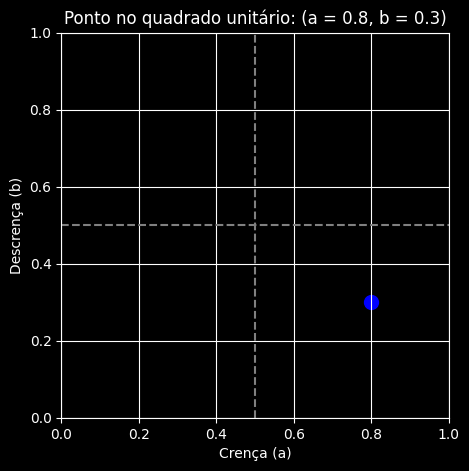

In [33]:
import matplotlib.pyplot as plt

def plt_ponto(a, b):
    plt.figure(figsize=(5, 5))
    plt.axhline(0.5, color='gray', linestyle='--')
    plt.axvline(0.5, color='gray', linestyle='--')
    plt.scatter(a, b, color='blue', s=100)
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('Crença (a)')
    plt.ylabel('Descrença (b)')
    plt.title(f'Ponto no quadrado unitário: (a = {a}, b = {b})')
    plt.grid(True)
    plt.show()
    
plt_ponto(0.8, 0.3)


## Bloco 8 - Exercício.

1. Crie a opinião de 3 especialistas.
2. Combine com OR. 
3. Calcule Gc e Gct.
4. Use decide() para interpretar.
5. Explique o que significa o resultado.

Tudo isso para entregar no classroom.

In [40]:
# 1. Crie a opinião de 3 especialistas.
op1 = (0.9, 0.1)
op2 = (0.4, 0.6)
op3 = (0.7, 0.2)

# 2. Combine com OR
opiniao_combinada = OR([op1, op2, op3])
print(f'Opinião combinada (OR): {opiniao_combinada}')

# 3. Calcule Gc e Gct.
Gc, Gct = NAP(*opiniao_combinada)
print(f'Grau de Certeza (Gc): {Gc:.2f} / Grau de Contradição (Gct): {Gct:.2f}')

# 4. Use decide() para interpretar.
decisao = decide(Gc, NE=0.7)
print(f'Decisão: {decisao}')

# 5. Explique o que significa o resultado.
print("""
      A opinião combinada dos especialistas 
      resultou em um grau de certeza que indica
      uma decisão favorável, pois Gc é maior que 
      o nível de exigência definido (0.7).""")

Opinião combinada (OR): (0.9, 0.6)
Grau de Certeza (Gc): 0.30 / Grau de Contradição (Gct): 0.50
Decisão: Não conclusivo.

      A opinião combinada dos especialistas 
      resultou em um grau de certeza que indica
      uma decisão favorável, pois Gc é maior que 
      o nível de exigência definido (0.7).
